<a href="https://colab.research.google.com/github/shubhangi-25/PGD/blob/main/PGD_Project_IntersectionalityIndianHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science to create a Social Impact

In [ ]:
import pandas as pd
df = pd.read_csv('/content/CardiacPatientDataPGD.csv')

In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Race', 'SES', 'Pre-existing Conditions',
       'Insurance Status (Y/N)', 'Marital Status', 'Employment Status',
       'Residential Area', 'AQI', 'Cardiac Condition', 'Treatment Plan',
       'Outcome'],
      dtype='object')

In [ ]:
df.head()

,Patient ID,Age,Gender,Race,SES,Pre-existing Conditions,Insurance Status (Y/N),Marital Status,Employment Status,Residential Area,AQI,Cardiac Condition,Treatment Plan,Outcome
0,1,65,Male,White,High,Hypertension,Yes,Married,Retired,Suburban,Moderate,MI,Surgery,Improved
1,2,54,Female,Black,Middle,"Diabetes,Hypertension",Yes,Divorced,Employed,Urban,Moderate,Heart Failure,Medications,Stable
2,3,72,Female,Hispanic,Middle,Hypertension,No,Single,Retired,Rural,Good,Arrhythmia,Medications,Stable
3,4,45,Male,Asian,Middle,NaN,Yes,Married,Employed,Suburban,Good,MI,Surgery,Improved
4,5,38,Male,White,Low,NaN,No,Married,Employed,Urban,Moderate,Arrhythmia,Lifestyle Changes,Stable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient ID               100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Race                     100 non-null    object
 4   SES                      100 non-null    object
 5   Pre-existing Conditions  76 non-null     object
 6   Insurance Status (Y/N)   100 non-null    object
 7   Marital Status           100 non-null    object
 8   Employment Status        100 non-null    object
 9   Residential Area         100 non-null    object
 10  AQI                      100 non-null    object
 11  Cardiac Condition        100 non-null    object
 12  Treatment Plan           100 non-null    object
 13  Outcome                  100 non-null    object
dtypes: int64(2), object(12)
memory usage: 11.1+

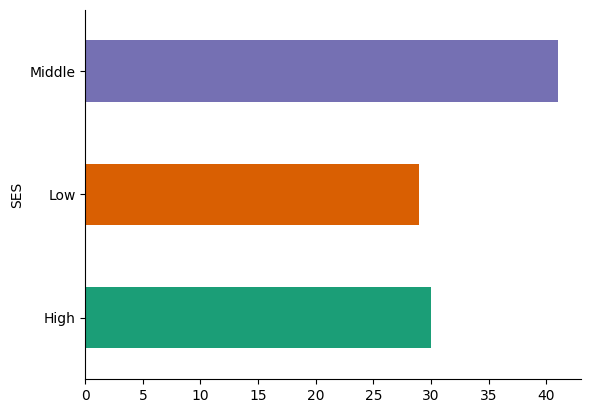

In [ ]:
### @title SES

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('SES').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

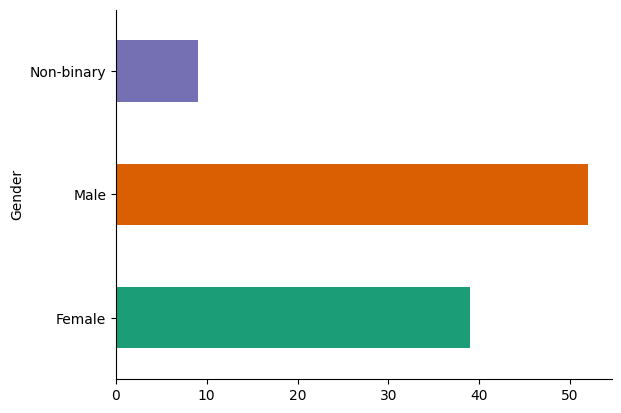

In [ ]:
### @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

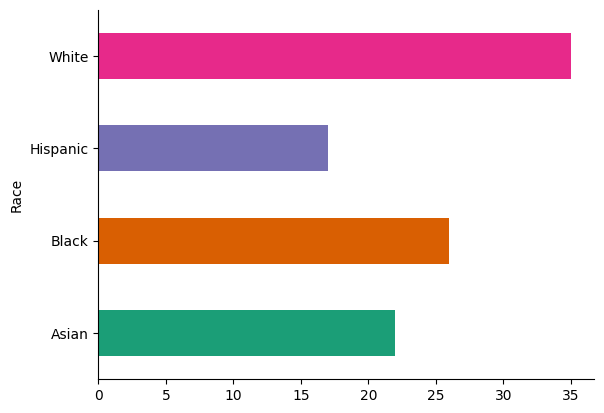

In [ ]:
### @title Race

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

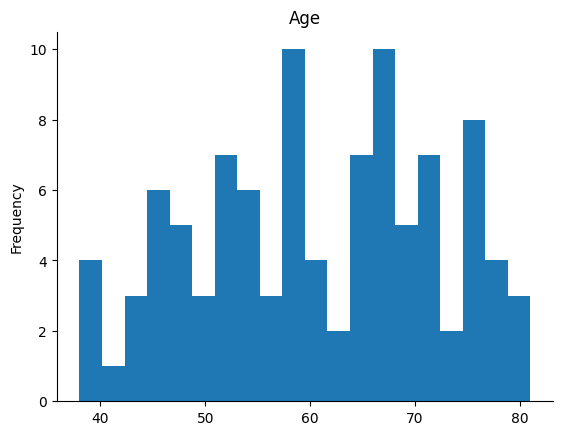

In [ ]:
### @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Intersectionality analysis: Group by Gender, Race, and SES
intersectionality_groups = df.groupby(['Gender', 'Race', 'SES', 'AQI', 'Outcome']).size().reset_index(name='Count')
# Display the intersectionality groups
intersectionality_groups

,Gender,Race,SES,AQI,Outcome,Count
0,Female,Asian,High,Good,Improved,2
1,Female,Asian,High,Moderate,Improved,2
2,Female,Asian,High,Unhealthy,Stable,1
3,Female,Asian,Low,Moderate,Deteriorated,1
4,Female,Asian,Middle,Moderate,Stable,1
...,...,...,...,...,...,...
64,Non-binary,Black,Middle,Unhealthy,Stable,1
65,Non-binary,White,High,Unhealthy,Stable,1
66,Non-binary,White,Low,Moderate,Deteriorated,1
67,Non-binary,White,Low,Unhealthy,Stable,1


In [ ]:
# df[['Gender', 'Race', 'SES', 'AQI', 'Outcome']]

In [ ]:
# df_numerical.corr(method = 'kendall' ).style.background_gradient()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Selecting columns of interest
columns_of_interest = ['Gender', 'Race', 'SES', 'AQI', 'Outcome']

# Creating a new dataframe with these columns
df_subset = df[columns_of_interest]

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df_subset['Gender_encoded'] = label_encoder.fit_transform(df_subset['Gender'])
df_subset['Race_encoded'] = label_encoder.fit_transform(df_subset['Race'])
df_subset['SES_encoded'] = label_encoder.fit_transform(df_subset['SES'])
df_subset['AQI_encoded'] = label_encoder.fit_transform(df_subset['AQI'])
df_subset['Outcome_encoded'] = label_encoder.fit_transform(df_subset['Outcome'])

# Convert Outcome to numerical values (assuming it's ordinal or can be encoded)
# You might need to define a mapping or use a similar approach to encode Outcome

# Display the first few rows to verify encoding
# print(df_subset.head())

# Compute correlation matrix
correlation_matrix = df_subset[['Gender_encoded', 'Race_encoded', 'SES_encoded', 'AQI_encoded','Outcome_encoded']].corr()

# Print correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix.style.background_gradient()

<ipython-input-12-6581ed21234c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Gender_encoded'] = label_encoder.fit_transform(df_subset['Gender'])
<ipython-input-12-6581ed21234c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Race_encoded'] = label_encoder.fit_transform(df_subset['Race'])
<ipython-input-12-6581ed21234c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c


Correlation Matrix:


,Gender_encoded,Race_encoded,SES_encoded,AQI_encoded,Outcome_encoded
Gender_encoded,1.000000,0.157471,-0.070921,-0.143340,0.334089
Race_encoded,0.157471,1.000000,-0.073189,0.043665,0.230115
SES_encoded,-0.070921,-0.073189,1.000000,0.176122,0.036610
AQI_encoded,-0.143340,0.043665,0.176122,1.000000,-0.263945
Outcome_encoded,0.334089,0.230115,0.036610,-0.263945,1.000000


In [ ]:
df_main = pd.read_csv('/content/CardiacPatientDataPGD.csv')

## Packages

### Statsmodels

**Statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

https://www.statsmodels.org/stable/index.html

### SciPy

The scipy.stats is the SciPy sub-package. It is mainly used for probabilistic distributions and statistical operations. There is a wide range of probability functions.

https://docs.scipy.org/doc/scipy/reference/stats.html

## Impact of SES on Health Outcomes
### How does socioeconomic status (SES) affect the health outcomes of cardiac patients?

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is already loaded
# df = df_main

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Encode 'SES' as categorical variable
df['SES_Encoded'] = df['SES'].map({'Low': 0, 'Middle': 1, 'High': 2})

# Define independent variables (SES and control variables)
X = df[['SES_Encoded']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.482453
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.1245
Time:                        08:15:45   Log-Likelihood:                -48.245
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                 0.0002116
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.6439      0.565     -4.682      0.000      -3.751      -1.537
SES_Encoded     1.2502    

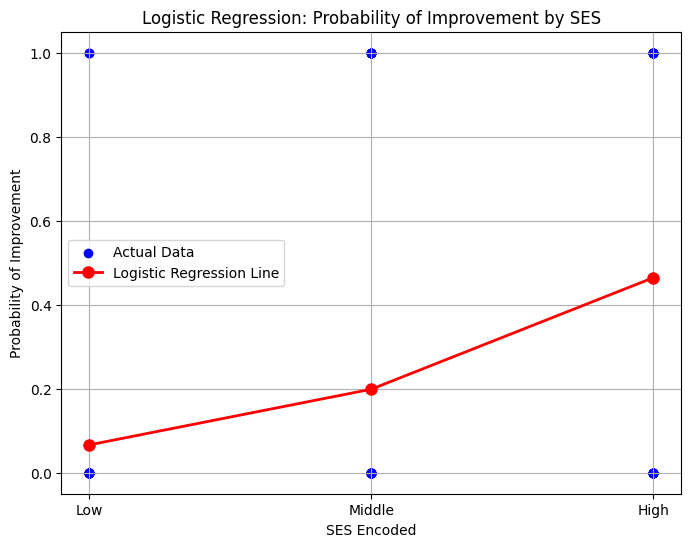

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predicted probabilities for plotting
ses_values = np.array([0, 1, 2])  # Assuming SES levels are 0, 1, 2
X_new = sm.add_constant(ses_values)
y_pred = result.predict(X_new)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['SES_Encoded'], df['Outcome_Binary'], color='blue', label='Actual Data')
plt.plot(ses_values, y_pred, color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Logistic Regression Line')
plt.xlabel('SES Encoded')
plt.ylabel('Probability of Improvement')
plt.title('Logistic Regression: Probability of Improvement by SES')
plt.xticks(ses_values, ['Low', 'Middle', 'High'])  # Replace with actual SES labels if necessary
plt.legend()
plt.grid(True)
plt.show()

## Air Quality and Cardiac Health
### What is the relationship between air quality index (AQI) and the health outcomes of cardiac patients?

In [ ]:
import pandas as pd
import scipy.stats as stats

df = df_main

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Create a contingency table
contingency_table = pd.crosstab(df['AQI'], df['Outcome_Binary'])

# Perform Chi-Square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test of Independence: ")
print(f"Chi-Square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Chi-Square Test of Independence: 
Chi-Square value: 14.289139618086988
P-value: 0.0007891376357545213
Degrees of freedom: 2
Expected frequencies:
Outcome_Binary      0     1
AQI                        
Good            22.80  7.20
Moderate        28.12  8.88
Unhealthy       25.08  7.92


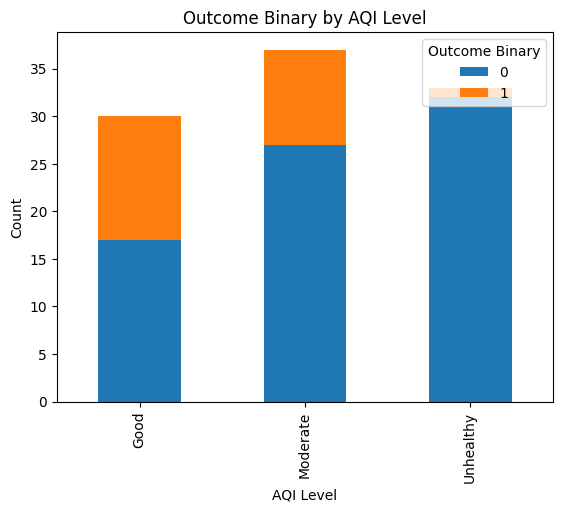

In [ ]:
# Plotting the contingency table
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('AQI Level')
plt.ylabel('Count')
plt.title('Outcome Binary by AQI Level')
plt.legend(title='Outcome Binary', loc='upper right')
plt.show()

## Age and Health Outcomes
### How does age influence the health outcomes of cardiac patients?
-Logistic Regression


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Define independent variables (age and any control variables)
X = df[['Age']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.546775
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                0.007811
Time:                        08:15:48   Log-Likelihood:                -54.678
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                    0.3535
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      1.258      0.002      0.998      -2.463       2.468
Age           -0.0192      0.

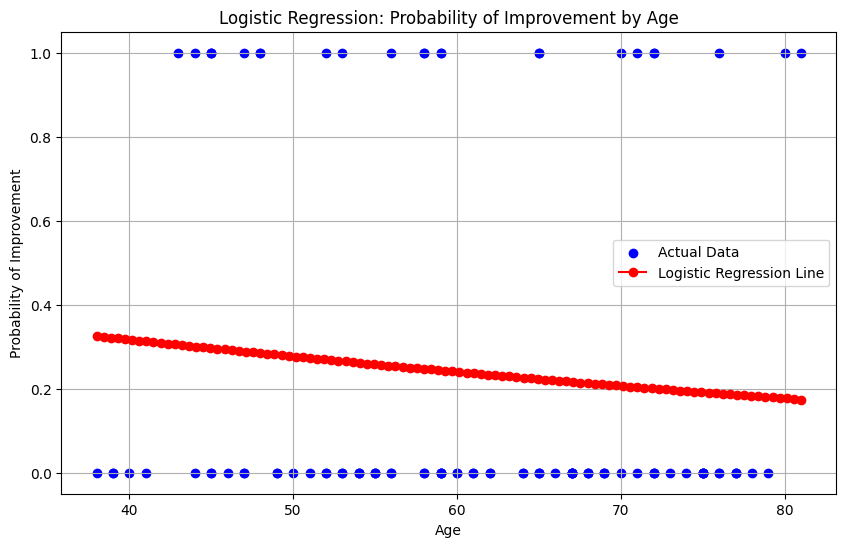

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)
X_new = sm.add_constant(age_range)
y_pred = result.predict(X_new)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Outcome_Binary'], color='blue', label='Actual Data')
plt.plot(age_range, y_pred, marker='o', color='red', label='Logistic Regression Line')
plt.xlabel('Age')
plt.ylabel('Probability of Improvement')
plt.title('Logistic Regression: Probability of Improvement by Age')
plt.legend()
plt.grid(True)
plt.show()

## Gender Differences in Cardiac Health
### Are there significant differences in health outcomes between male and female cardiac patients?
-Chi-Square test


In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming df is already loaded

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Outcome_Binary'])
print(contingency_table)
# Perform Chi-Square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test of Independence")
print(f"Chi-Square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Outcome_Binary   0   1
Gender                
Female          34   5
Male            33  19
Non-binary       9   0
Chi-Square Test of Independence
Chi-Square value: 9.996345029239766
P-value: 0.006750271756945618
Degrees of freedom: 2
Expected frequencies:
Outcome_Binary      0      1
Gender                      
Female          29.64   9.36
Male            39.52  12.48
Non-binary       6.84   2.16


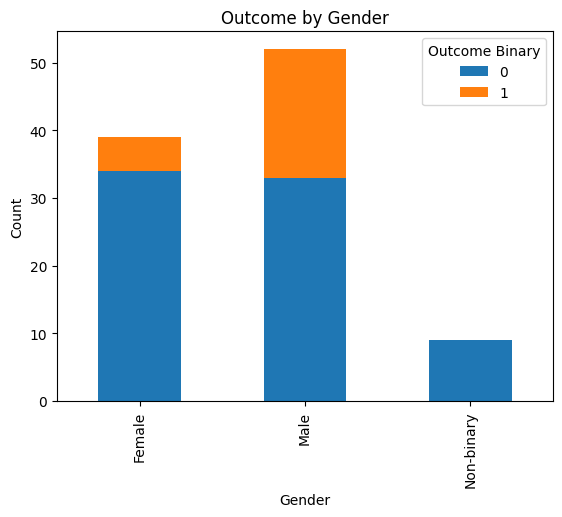

In [ ]:
# Plotting the contingency table
contingency_table.plot(kind='bar', stacked=True,)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Outcome by Gender')
plt.legend(title='Outcome Binary', loc='upper right')
plt.show()

## Effect of Race/Ethnicity on Cardiac Health
### How does race/ethnicity impact the health outcomes of cardiac patients?


In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Race', 'SES', 'Pre-existing Conditions',
       'Insurance Status (Y/N)', 'Marital Status', 'Employment Status',
       'Residential Area', 'AQI', 'Cardiac Condition', 'Treatment Plan',
       'Outcome', 'Outcome_Binary'],
      dtype='object')

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Encode 'Race' as numerical values (if needed)
# Example: Assuming 'Race' is categorical, encode it into numerical values
df['Race_Encoded'] = pd.factorize(df['Race'])[0]

# Define independent variables (Race and any control variables)
X = df[['Race_Encoded']]  # Replace with actual column name if encoded

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.544321
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                 0.01226
Time:                        08:15:51   Log-Likelihood:                -54.432
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                    0.2450
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4667      0.371     -3.954      0.000      -2.194      -0.740
Race_Encoded     0.2342

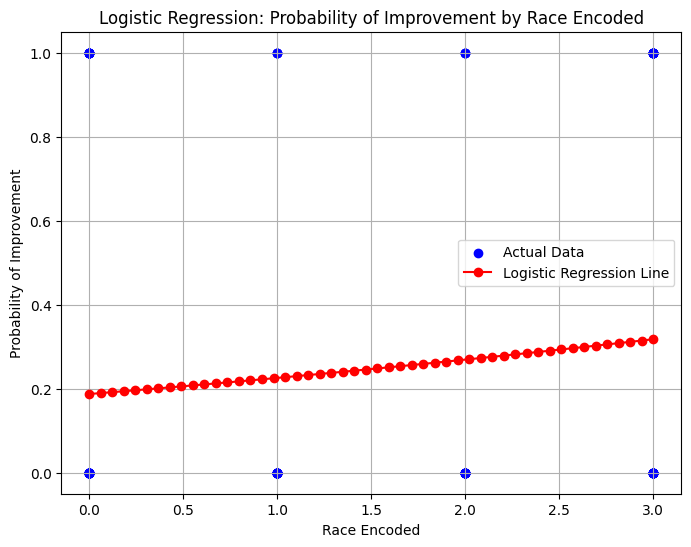

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Race_Encoded'], y, color='blue', label='Actual Data')

# Plotting the logistic regression line
X_min = df['Race_Encoded'].min()
X_max = df['Race_Encoded'].max()
X_pred = np.linspace(X_min, X_max, 50)
X_pred_constant = sm.add_constant(X_pred)
y_pred_prob = result.predict(X_pred_constant)
plt.plot(X_pred, y_pred_prob, marker='o', color='red', label='Logistic Regression Line')

plt.xlabel('Race Encoded')
plt.ylabel('Probability of Improvement')
plt.title('Logistic Regression: Probability of Improvement by Race Encoded')
plt.legend()
plt.grid(True)
plt.show()

## Pre-existing Conditions and Health Outcomes
### What is the effect of pre-existing conditions on the health outcomes of cardiac patients?


In [ ]:
df = df_main

In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Race', 'SES', 'Pre-existing Conditions',
       'Insurance Status (Y/N)', 'Marital Status', 'Employment Status',
       'Residential Area', 'AQI', 'Cardiac Condition', 'Treatment Plan',
       'Outcome', 'Outcome_Binary', 'Race_Encoded'],
      dtype='object')

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Create binary columns for each pre-existing condition
pre_existing_conditions = df['Pre-existing Conditions'].str.get_dummies(sep=', ')

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, pre_existing_conditions], axis=1)

# Define independent variables (pre-existing conditions and any control variables)
X = df[pre_existing_conditions.columns]  # Select all pre-existing condition columns
X = sm.add_constant(X)  # Add a constant to the model (intercept)

# Define the dependent variable
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X.astype(float))
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545788
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                0.009603
Time:                        08:15:52   Log-Likelihood:                -54.579
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                    0.7871
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8873      0.449     -1.976      0.048      -1.768      -0.

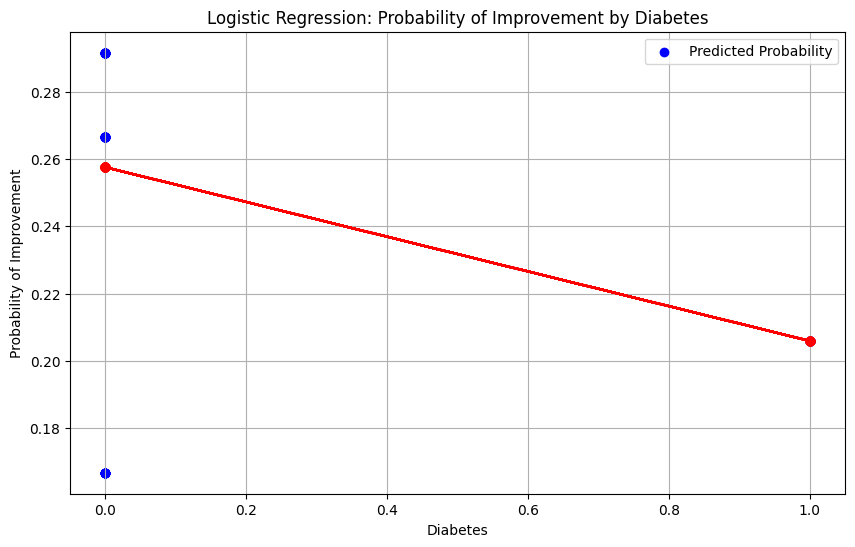

In [ ]:
from numpy.polynomial.polynomial import polyfit

#Plotting the logistic regression line
plt.figure(figsize=(10, 6))

# Select an independent variable for plotting (e.g., the first one)
# Replace 'Diabetes' with the actual column name from X you want to plot
x_variable = 'Diabetes'
b, m = polyfit(df[x_variable], result.predict(X), 1)
plt.scatter(df[x_variable], result.predict(X), color='blue', label='Predicted Probability')
plt.xlabel(x_variable)
plt.ylabel('Probability of Improvement')
plt.title(f'Logistic Regression: Probability of Improvement by {x_variable}')
plt.legend()
plt.plot(df[x_variable], b + m * df[x_variable], marker='o', color='red')
plt.grid(True)
plt.show()

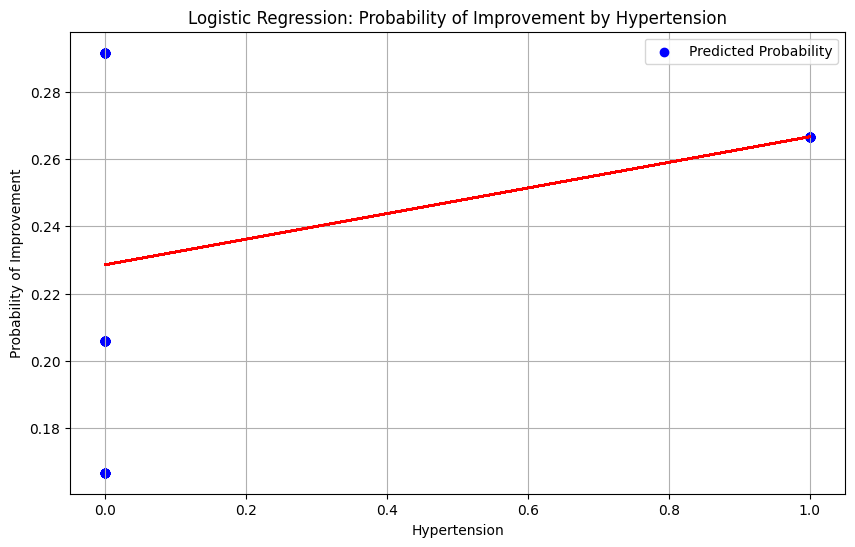

In [ ]:
from numpy.polynomial.polynomial import polyfit

#Plotting the logistic regression line
plt.figure(figsize=(10, 6))

# Select an independent variable for plotting (e.g., the first one)
# Replace 'Diabetes' with the actual column name from X you want to plot
x_variable = 'Hypertension'
b, m = polyfit(df[x_variable], result.predict(X), 1)
plt.scatter(df[x_variable], result.predict(X), color='blue', marker='o', label='Predicted Probability')
plt.xlabel(x_variable)
plt.ylabel('Probability of Improvement')
plt.title(f'Logistic Regression: Probability of Improvement by {x_variable}')
plt.legend()
plt.plot(df[x_variable], b + m * df[x_variable], '-', color='red')
plt.grid(True)
plt.show()

## Influence of AQI Categories on Health Outcomes
### How do different categories of air quality (e.g., Good, Moderate, Unhealthy) impact the health outcomes of cardiac patients?

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Encode AQI categories as numerical values
# Assuming 'AQI' is categorical, encode it into numerical values
aqi_mapping = {'Good': 0, 'Moderate': 1, 'Unhealthy': 2}
df['AQI_Encoded'] = df['AQI'].map(aqi_mapping)

# Define independent variables (AQI and any control variables)
X = df[['AQI_Encoded']]  # Replace with actual column name if encoded

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.476238
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.1358
Time:                        08:15:54   Log-Likelihood:                -47.624
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                 0.0001093
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1026      0.346     -0.296      0.767      -0.781       0.576
AQI_Encoded    -1.2607    

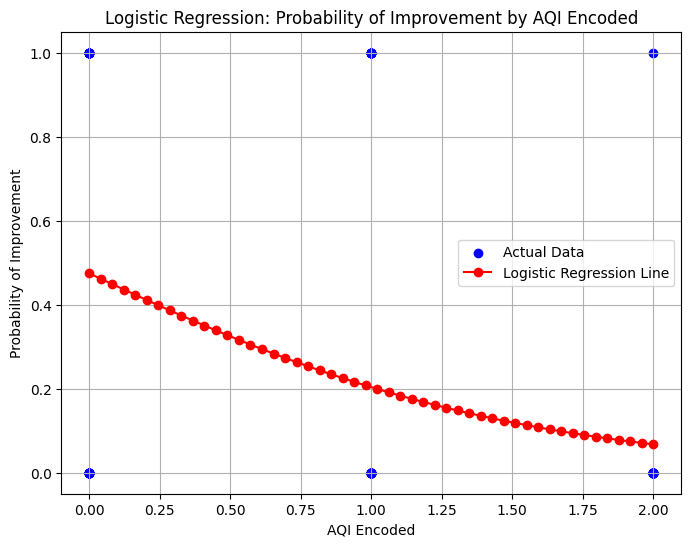

In [ ]:
# Plotting the logistic regression curve
plt.figure(figsize=(8, 6))

# Scatter plot of actual data points
plt.scatter(df['AQI_Encoded'], y, color='blue', label='Actual Data')

# Plotting the logistic regression line
X_pred = np.linspace(X['AQI_Encoded'].min(), X['AQI_Encoded'].max(), 50)
X_pred_constant = sm.add_constant(X_pred)
y_pred_prob = result.predict(X_pred_constant)
plt.plot(X_pred, y_pred_prob, color='red', marker='o', label='Logistic Regression Line')

plt.xlabel('AQI Encoded')
plt.ylabel('Probability of Improvement')
plt.title('Logistic Regression: Probability of Improvement by AQI Encoded')
plt.legend()
plt.grid(True)
plt.show()

### How does insurance status affect the health outcomes of cardiac patients?

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Encode 'Insurance Status (Y/N)' into binary variable: Yes = 1, No = 0
df['Insurance_Encoded'] = df['Insurance Status (Y/N)'].map({'Yes': 1, 'No': 0})

# Define independent variable (Insurance Status) and add a constant
X = df[['Insurance_Encoded']]
X = sm.add_constant(X)

# Define dependent variable (Outcome)
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.534303
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                 0.03044
Time:                        08:15:55   Log-Likelihood:                -53.430
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                   0.06698
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8245      0.482     -3.786      0.000      -2.769      -0.880
Insuranc

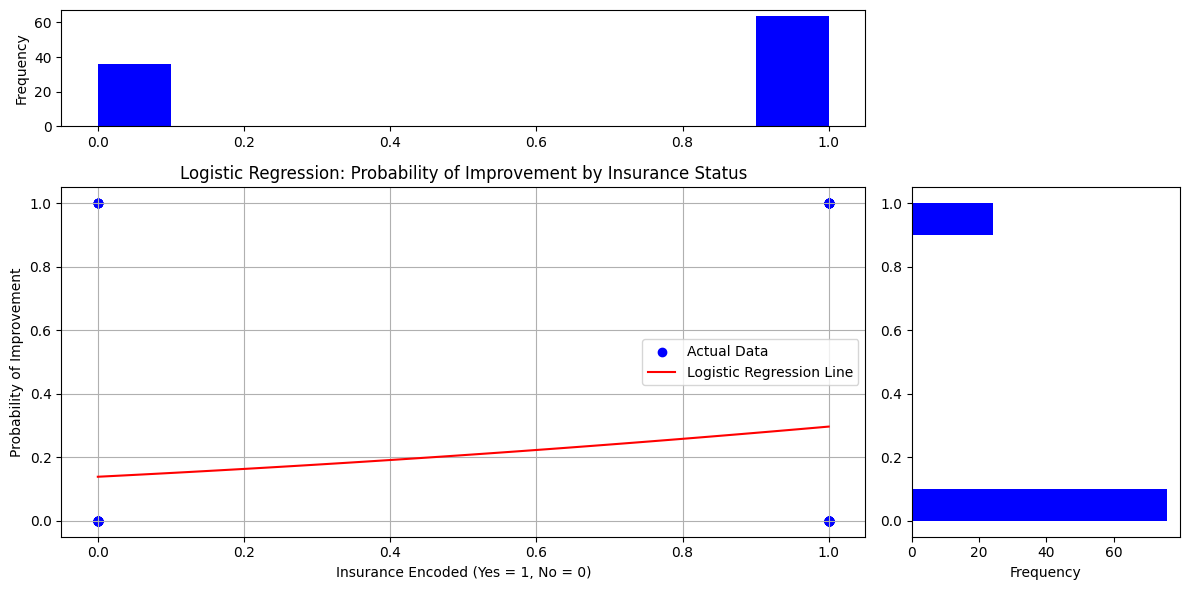

In [ ]:
# Create figure with gridspec layout
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[3, 1], height_ratios=[1, 3])

# Scatter plot and logistic regression line
ax_main = fig.add_subplot(gs[1, 0])
ax_main.scatter(df['Insurance_Encoded'], y, color='blue', label='Actual Data')

X_pred = np.linspace(df['Insurance_Encoded'].min(), df['Insurance_Encoded'].max(), 50)
X_pred_constant = sm.add_constant(X_pred)
y_pred_prob = result.predict(X_pred_constant)
ax_main.plot(X_pred, y_pred_prob, color='red', label='Logistic Regression Line')

ax_main.set_xlabel('Insurance Encoded (Yes = 1, No = 0)')
ax_main.set_ylabel('Probability of Improvement')
ax_main.set_title('Logistic Regression: Probability of Improvement by Insurance Status')
ax_main.legend()
ax_main.grid(True)

# Histogram for Insurance Status
ax_hist_x = fig.add_subplot(gs[0, 0], sharex=ax_main)
ax_hist_x.hist(df['Insurance_Encoded'], bins=10, orientation='vertical', color='blue')
ax_hist_x.set_ylabel('Frequency')

# Histogram for Outcome Binary
ax_hist_y = fig.add_subplot(gs[1, 1], sharey=ax_main)
ax_hist_y.hist(y, bins=10, orientation='horizontal', color='blue')
ax_hist_y.set_xlabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Employment Status and Health Outcomes




### What is the relationship between employment status and the health outcomes of cardiac patients?



In [ ]:
df = df_main.sort_values('Employment Status')

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Convert 'Employment Status' to categorical variable
df['Employment_Cat'] = pd.Categorical(df['Employment Status'])

# Define independent variables (Employment Status dummies) and add a constant
X = sm.add_constant(pd.get_dummies(df['Employment_Cat']))

# Define dependent variable (Outcome_Binary)
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X.astype(float))
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507247
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                 0.07954
Time:                        08:15:57   Log-Likelihood:                -50.725
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                   0.01248
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0742        nan        nan        nan         nan         nan
Employed       0.4150        

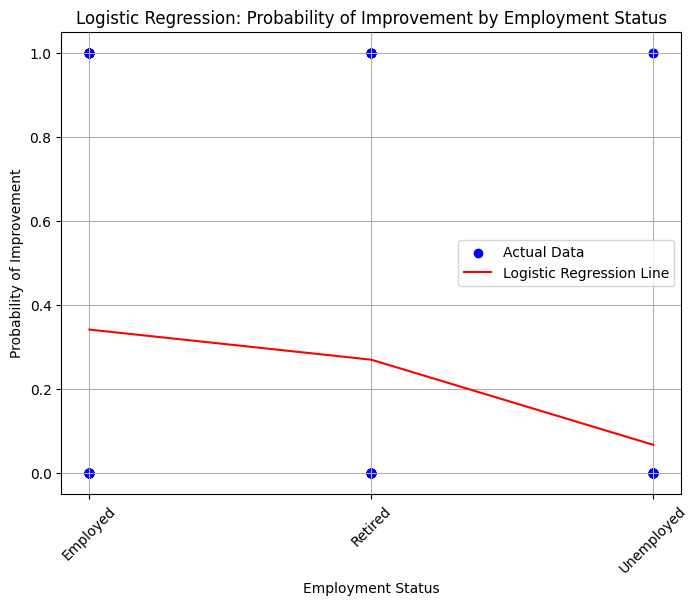

In [ ]:
# Plotting the logistic regression line with scatter plot of actual data points
plt.figure(figsize=(8, 6))

# Scatter plot of actual data points
plt.scatter(df['Employment_Cat'], y, color='blue', label='Actual Data')

# Plotting the logistic regression line
categories = df['Employment_Cat'].unique()

y_pred_prob = result.predict(X.astype(float))

plt.plot(df['Employment_Cat'], y_pred_prob, color='red', label='Logistic Regression Line')

plt.xlabel('Employment Status')
plt.ylabel('Probability of Improvement')
plt.title('Logistic Regression: Probability of Improvement by Employment Status')
plt.xticks(categories, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#	Research Questions from an Intersectional lens and corresponding analysis:

## Socioeconomic and Health Disparities

## What is the relationship between gender and the outcome of cardiac conditions across different SES levels?
-Chi-Square Test of Independence (Rows: Gender, Outcome; Columns: SES)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation) with Gender and Outcome as rows, and SES as columns
contingency_table = pd.crosstab(index=[df['Gender'], df['Outcome']], columns=df['SES'])

# Print the contingency table to inspect
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Contingency Table:
SES                      High  Low  Middle
Gender     Outcome                        
Female     Deteriorated     2   11       6
           Improved         4    0       1
           Stable           4    1      10
Male       Deteriorated     0    5       2
           Improved        10    2       7
           Stable           7    7      12
Non-binary Deteriorated     0    1       0
           Stable           3    2       3

Chi-Square Test Results:
Chi-Square Statistic: 34.70762229645192
P-value: 0.0016237124305515545
Degrees of Freedom: 14
Expected Frequencies Table:
SES                      High   Low  Middle
Gender     Outcome                         
Female     Deteriorated   5.7  5.51    7.79
           Improved       1.5  1.45    2.05
           Stable         4.5  4.35    6.15
Male       Deteriorated   2.1  2.03    2.87
           Improved       5.7  5.51    7.79
           Stable         7.8  7.54   10.66
Non-binary Deteriorated   0.3  0.29    0.41
       

<Figure size 1000x600 with 0 Axes>

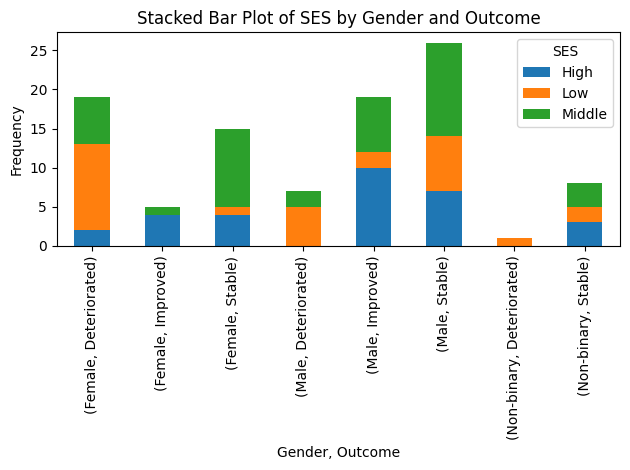

In [ ]:
# Plotting the contingency table as a bar plot
plt.figure(figsize=(10, 6))

# Create a stacked bar plot for each combination of Gender and Outcome
contingency_table.plot(kind='bar', stacked=True, rot=90)
plt.title('Stacked Bar Plot of SES by Gender and Outcome')
plt.xlabel('Gender, Outcome')
plt.ylabel('Frequency')
plt.legend(title='SES')

plt.tight_layout()
plt.show()

#### How does race and SES intersect to influence the health outcomes of cardiac patients?
-Logistic Regression with Interaction terms


In [ ]:
df = df_main

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Assuming df is already loaded and contains necessary columns: Race, SES, Outcome

# Encode categorical variables if needed
label_encoder = LabelEncoder()
df['Race_Code'] = label_encoder.fit_transform(df['Race'])
df['SES_Code'] = label_encoder.fit_transform(df['SES'])

# Encode Outcome variable (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Create interaction terms between Race and SES
df['Race_SES_Interact'] = df['Race_Code'] * df['SES_Code']

# Define dependent (y) and independent variables (X)
y = df['Outcome_Code']
X = df[['Race_Code', 'SES_Code', 'Race_SES_Interact']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the regression
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.517370
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Outcome_Code   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                 0.06117
Time:                        08:15:58   Log-Likelihood:                -51.737
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                   0.08059
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1635      0.586     -0.279      0.780      -1.313       0.986
Race_Cod

In [ ]:
df['SES'].unique()

array(['High', 'Middle', 'Low'], dtype=object)

Optimization terminated successfully.
         Current function value: 0.512001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.356782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.462412
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583617
         Iterations 5


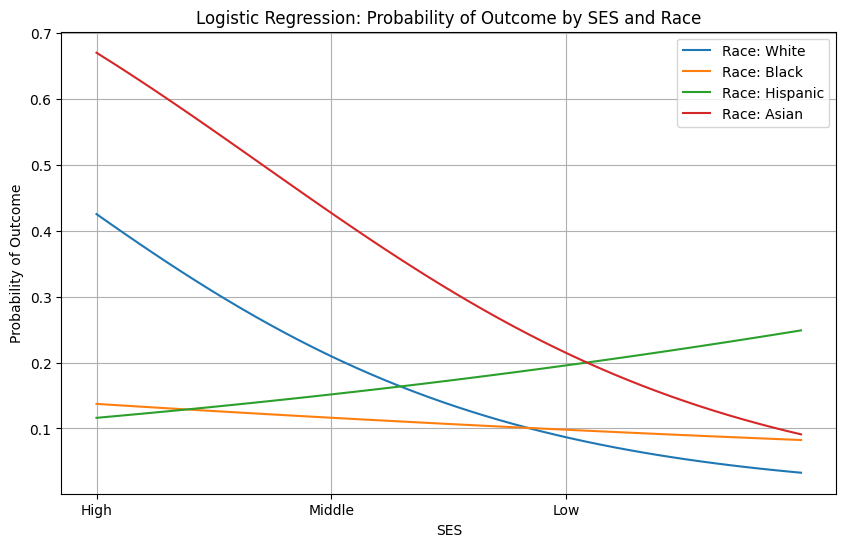

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains necessary columns: SES, Race, Outcome

# Encode Race if needed
label_encoder = LabelEncoder()
df['Race_Code'] = label_encoder.fit_transform(df['Race'])

# Encode Outcome variable (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Define the SES values you want to plot (assuming SES is categorical or ordinal)
ses_values = df['SES'].unique()

# Initialize plot
plt.figure(figsize=(10, 6))

# Iterate over each race category
for race_code, race_name in enumerate(df['Race'].unique()):
    # Subset data for the current race
    df_race = df[df['Race'] == race_name]

    # Fit logistic regression model for the current race
    logit_model = sm.Logit(df_race['Outcome_Code'], sm.add_constant(df_race['SES_Code']))
    result = logit_model.fit()

    # Predict probabilities for SES values
    ses_predict = np.linspace(0, len(ses_values), 50)  # Adjust based on SES range
    probabilities = result.predict(sm.add_constant(ses_predict))

    # Plot regression line
    plt.plot(ses_predict, probabilities, label=f'Race: {race_name}')

# Labeling and styling the plot
plt.xlabel('SES')
plt.ylabel('Probability of Outcome')
plt.title('Logistic Regression: Probability of Outcome by SES and Race')
plt.xticks(range(len(ses_values)), ses_values)  # Adjust ticks according to SES values
plt.legend()
plt.grid(True)
plt.show()

## Gender and Health


#### What are the differences in cardiac health outcomes between male, female, and non-binary patients, and how is it influenced by SES?
-Chi-Square Test, Logistic Regression

In [ ]:
df_main = pd.read_csv('/content/CardiacPatientDataPGD.csv')
df = df_main

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Outcome'])

# Perform Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Chi-Square Test Statistic: 22.59879854125886
P-value: 0.000152270981822104
Expected frequencies:
Outcome     Deteriorated  Improved  Stable
Gender                                    
Female             10.53      9.36   19.11
Male               14.04     12.48   25.48
Non-binary          2.43      2.16    4.41


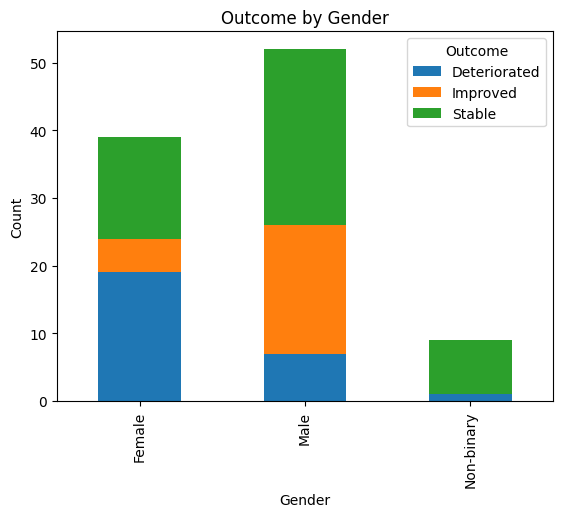

In [ ]:
# Plotting the contingency table
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Outcome by Gender')
plt.legend(title='Outcome')
plt.show()

In [ ]:
df = df_main

### How does marital status affect the health outcomes of cardiac patients, and are there gender-specific trends?
-Logistic Regression


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

df = df_main
# Encode categorical variables
# Encode Marital Status and Gender
label_encoder = LabelEncoder()
df['Marital_Status_Code'] = label_encoder.fit_transform(df['Marital Status'])
df['Gender_Code'] = label_encoder.fit_transform(df['Gender'])

# Define dependent (y) and independent variables (X)
# Assuming Outcome is binary coded (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

y = df['Outcome_Code']
X = df[['Marital_Status_Code', 'Gender_Code']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.547564
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Outcome_Code   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                0.006380
Time:                        08:16:00   Log-Likelihood:                -54.756
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                    0.7036
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4397      0.530     -2.717      0.007      -2.478      -0.401
Ma

Optimization terminated successfully.
         Current function value: 0.547564
         Iterations 5


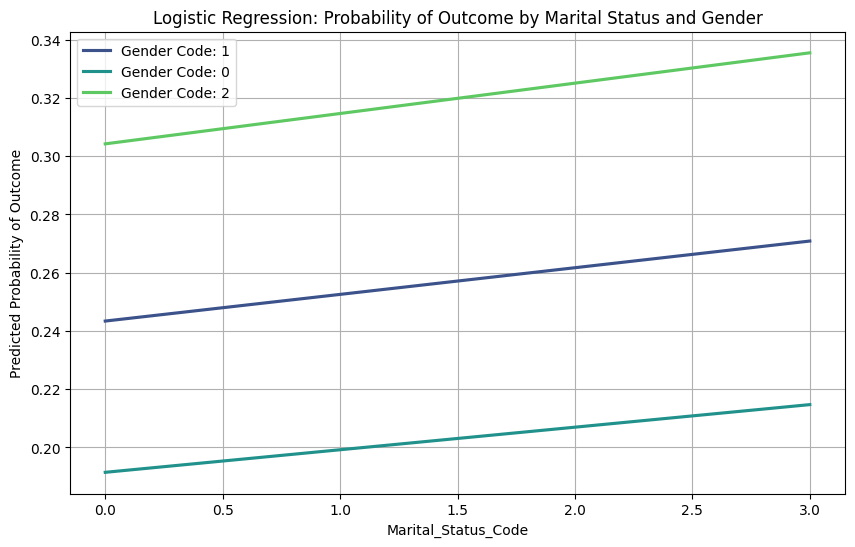

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming df_main is your dataframe containing necessary columns: Marital Status, Gender, Outcome

# Encode categorical variables if needed
label_encoder = LabelEncoder()
df['Marital_Status_Code'] = label_encoder.fit_transform(df['Marital Status'])
df['Gender_Code'] = label_encoder.fit_transform(df['Gender'])

# Define dependent (y) and independent variables (X)
# Assuming Outcome is binary coded (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

y = df['Outcome_Code']
X = df[['Marital_Status_Code', 'Gender_Code']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Predict probabilities
df['predicted_prob'] = result.predict(X)

# Initialize plot
plt.figure(figsize=(10, 6))

# Get unique Gender classes
unique_gender_classes = df['Gender_Code'].unique()

# Generate a custom color palette
palette = sns.color_palette("viridis", len(unique_gender_classes))

# Plot the regression lines for each Gender_Code
for i, gender_code in enumerate(unique_gender_classes):
    subset = df[df['Gender_Code'] == gender_code]
    sns.regplot(x='Marital_Status_Code', y='predicted_prob', data=subset,
                scatter=False, label=f'Gender Code: {gender_code}', color=palette[i])

# Labeling and styling the plot
plt.xlabel('Marital_Status_Code')
plt.ylabel('Predicted Probability of Outcome')
plt.title('Logistic Regression: Probability of Outcome by Marital Status and Gender')
plt.legend()
plt.grid(True)
plt.show()

0. Divorced
1. married
2. Single
3. Widowed

Gender:  2:Male  ; 1:Female


Marital_Status: Red
Gender: Green


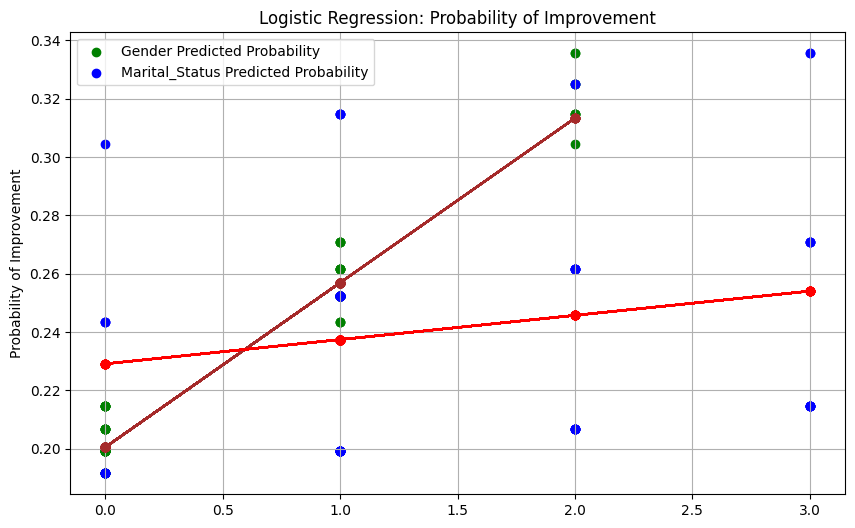

In [ ]:
from numpy.polynomial.polynomial import polyfit

#Plotting the logistic regression line
plt.figure(figsize=(10, 6))

# Select an independent variable for plotting (e.g., the first one)
# Replace 'Diabetes' with the actual column name from X you want to plot
x_variable = 'Gender_Code'
b, m = polyfit(df[x_variable], result.predict(X), 1)
plt.scatter(df[x_variable], result.predict(X), color='green', label='Gender Predicted Probability')
# plt.xlabel(x_variable)
plt.ylabel('Probability of Improvement')
plt.title(f'Logistic Regression: Probability of Improvement')
plt.plot(df[x_variable], b + m * df[x_variable], marker='o', color='brown')

x_variable = 'Marital_Status_Code'
b, m = polyfit(df[x_variable], result.predict(X), 1)
plt.scatter(df[x_variable], result.predict(X), color='blue', label='Marital_Status Predicted Probability')
# plt.xlabel(x_variable)
plt.plot(df[x_variable], b + m * df[x_variable], marker='o', color='red')

plt.legend()
plt.grid(True)
print('Marital_Status: Red')
print('Gender: Green')
plt.show()

## Race/Ethnicity and Health Outcomes

### How do cardiac health outcomes vary among different racial/ethnic groups, and what role does SES play in these differences?

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

df = df_main

# Encode categorical variables
label_encoder = LabelEncoder()
df['Race_Code'] = label_encoder.fit_transform(df['Race'])
df['SES_Code'] = label_encoder.fit_transform(df['SES'])

# Define dependent variable (Outcome_Code)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)
y = df['Outcome_Code']

# Define independent variables (including main effects and interaction terms if needed)
X = df[['Race_Code', 'SES_Code']]

# # Add interaction terms if needed
# df['Race_SES_Interact'] = df['Race_Code'] * df['SES_Code']
# X = df[['Race_Code', 'SES_Code', 'Race_SES_Interact']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.517391
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Outcome_Code   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                 0.06113
Time:                        08:16:04   Log-Likelihood:                -51.739
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                   0.03443
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1432      0.497     -0.288      0.773      -1.117       0.831
Race_Code     -0.1881      0.

Optimization terminated successfully.
         Current function value: 0.512001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.356782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.462412
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583617
         Iterations 5


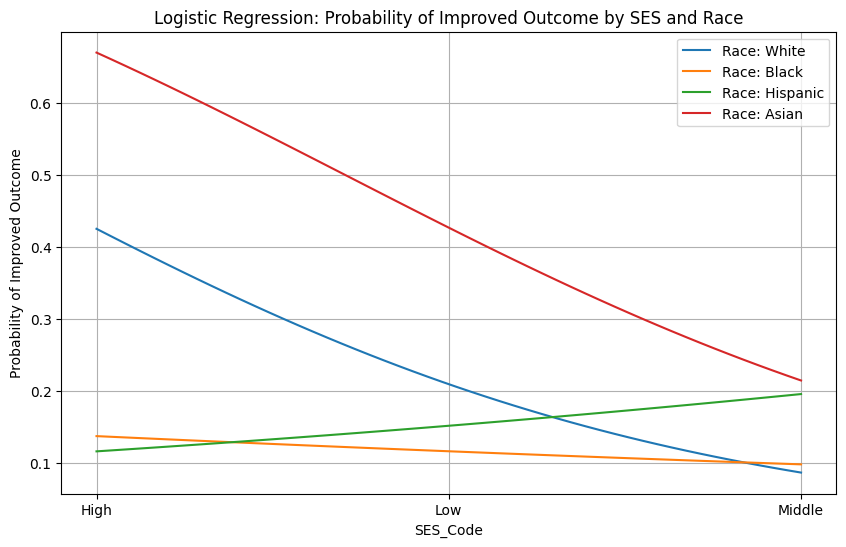

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df is already loaded and contains necessary columns: Race, SES, Outcome

# Encode Race and SES if needed
label_encoder = LabelEncoder()
df['Race_Code'] = label_encoder.fit_transform(df['Race'])
df['SES_Code'] = label_encoder.fit_transform(df['SES'])

# Encode Outcome variable (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Initialize plot
plt.figure(figsize=(10, 6))

# Iterate over each race category
for race_code, race_name in enumerate(df['Race'].unique()):
    # Subset data for the current race
    df_race = df[df['Race'] == race_name]

    # Fit logistic regression model for the current race
    logit_model = sm.Logit(df_race['Outcome_Code'], sm.add_constant(df_race['SES_Code']))
    result = logit_model.fit()

    # Predict probabilities for SES values
    ses_predict = np.linspace(0, len(df['SES_Code'].unique()) - 1, 50)  # Adjust based on SES range
    X_predict = sm.add_constant(ses_predict)
    probabilities = result.predict(X_predict)

    # Plot regression line
    plt.plot(ses_predict, probabilities, label=f'Race: {race_name}')

# Labeling and styling the plot
plt.xlabel('SES_Code')
plt.ylabel('Probability of Improved Outcome')
plt.title('Logistic Regression: Probability of Improved Outcome by SES and Race')
plt.xticks(range(len(df['SES_Code'].unique())), sorted(df['SES'].unique()))  # Adjust ticks according to SES values
plt.legend()
plt.grid(True)
plt.show()

### What is the impact of insurance status on the cardiac health outcomes of different racial/ethnic groups?
-Logistic Regression


In [ ]:
df = df_main = pd.read_csv('/content/CardiacPatientDataPGD.csv')
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Race', 'SES', 'Pre-existing Conditions',
       'Insurance Status (Y/N)', 'Marital Status', 'Employment Status',
       'Residential Area', 'AQI', 'Cardiac Condition', 'Treatment Plan',
       'Outcome'],
      dtype='object')

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['Race_Code'] = label_encoder.fit_transform(df['Race'])
df['Insurance_Status_Code'] = label_encoder.fit_transform(df['Insurance Status (Y/N)'])

# Define dependent variable (Outcome_Code)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)
y = df['Outcome_Code']

# Define independent variables
X = df[['Race_Code', 'Insurance_Status_Code']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530312
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Outcome_Code   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                 0.03769
Time:                        08:16:05   Log-Likelihood:                -53.031
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                    0.1253
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5680      0.555     -2.824      0.005      -2.656      -0.

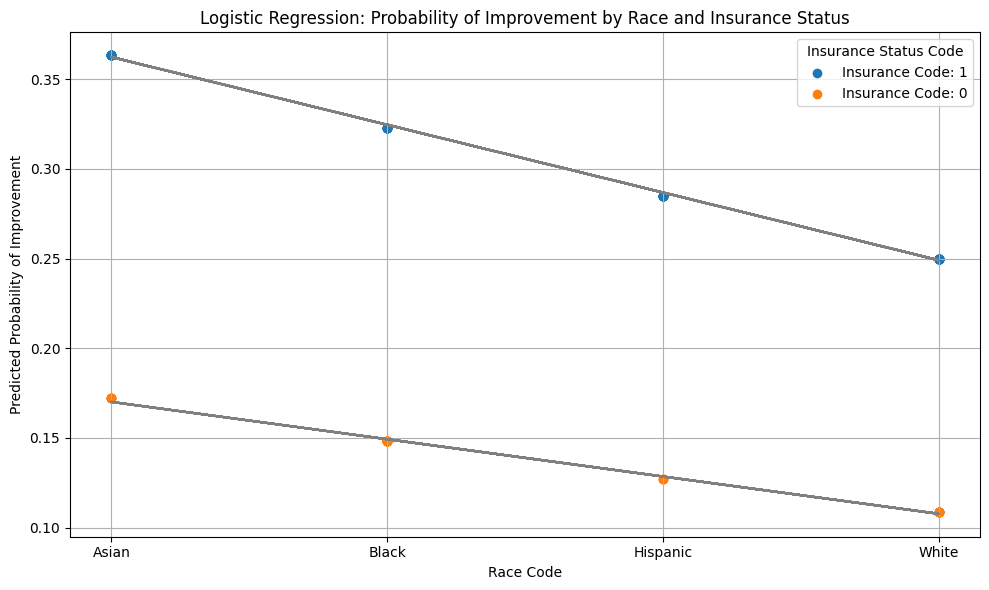

In [ ]:

# Predict probabilities
df['predicted_prob'] = result.predict(X)

# Initialize plot
plt.figure(figsize=(10, 6))

# Plot for Race_Code with regression lines for Insurance_Status_Code
for insurance_code in df['Insurance_Status_Code'].unique():
    subset = df[df['Insurance_Status_Code'] == insurance_code]

    # Fit regression line
    reg_line = sm.OLS(subset['predicted_prob'], sm.add_constant(subset['Race_Code'])).fit()
    plt.plot(subset['Race_Code'], reg_line.predict(sm.add_constant(subset['Race_Code'])), color='gray')
    plt.scatter(subset['Race_Code'], subset['predicted_prob'], label=f'Insurance Code: {insurance_code}')

plt.xlabel('Race Code')
plt.ylabel('Predicted Probability of Improvement')
plt.title('Logistic Regression: Probability of Improvement by Race and Insurance Status')
plt.xticks(range(len(df['Race'].unique())), sorted(df['Race'].unique()))
plt.legend(title='Insurance Status Code')
plt.grid(True)

plt.tight_layout()
plt.show()

## Environmental Factors

###How does air quality (AQI) affect cardiac health outcomes, and are there differences across SES, race/ethnicity, and residential areas?
-Logistic Regression


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables if needed
label_encoder = LabelEncoder()
df['SES_Code'] = label_encoder.fit_transform(df['SES'])
df['Race_Code'] = label_encoder.fit_transform(df['Race'])
df['Residential_Area_Code'] = label_encoder.fit_transform(df['Residential Area'])
df['AQI_Code'] = label_encoder.fit_transform(df['AQI'])

# Encode Outcome variable (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Define dependent (y) and independent variables (X)
y = df['Outcome_Code']
X = df[['AQI_Code', 'SES_Code', 'Race_Code', 'Residential_Area_Code']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X.astype(float))
result = logit_model.fit()

# Print summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.453205
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Outcome_Code   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.1776
Time:                        08:16:06   Log-Likelihood:                -45.321
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                 0.0006057
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0578      0.839     -0.069      0.945      -1.702       1.

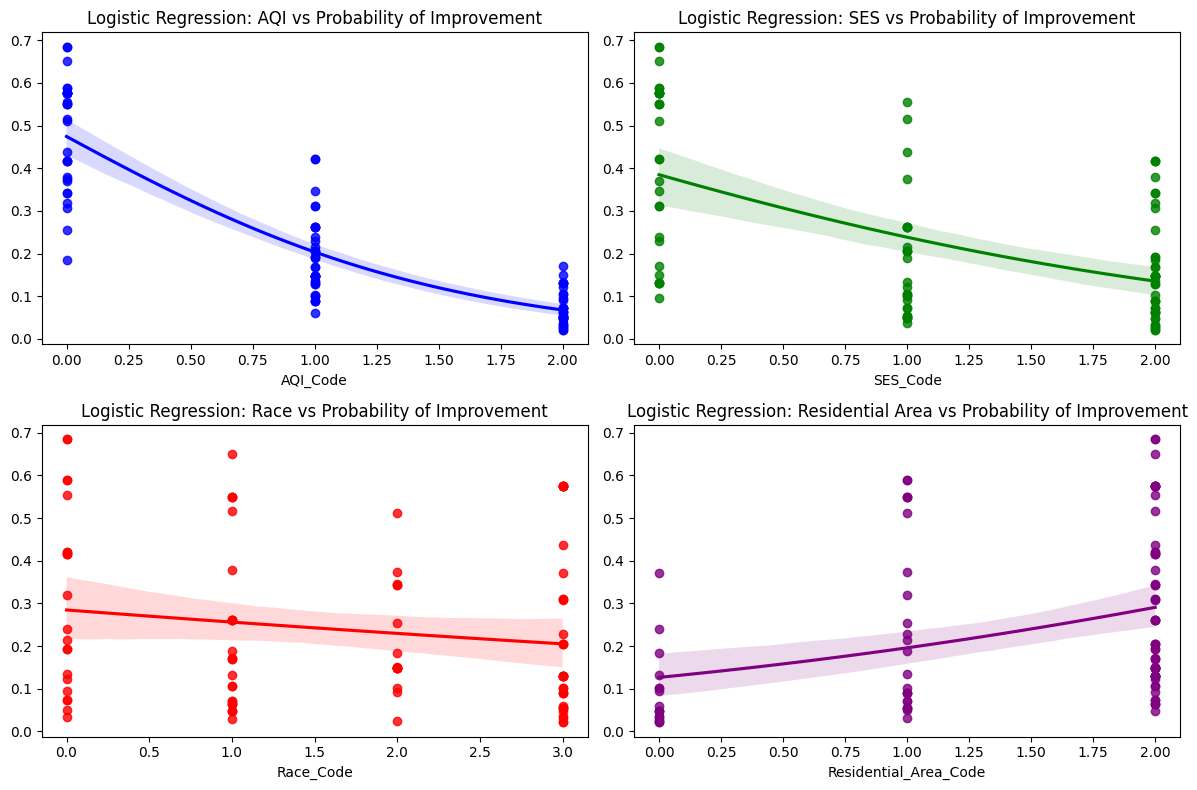

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting the regression coefficients
plt.figure(figsize=(12, 8))

# Plot AQI
plt.subplot(221)
sns.regplot(x=df['AQI_Code'], y=result.predict(X), logistic=True, color='blue')
plt.title('Logistic Regression: AQI vs Probability of Improvement')

# Plot SES
plt.subplot(222)
sns.regplot(x=df['SES_Code'], y=result.predict(X), logistic=True, color='green')
plt.title('Logistic Regression: SES vs Probability of Improvement')

# Plot Race
plt.subplot(223)
sns.regplot(x=df['Race_Code'], y=result.predict(X), logistic=True, color='red')
plt.title('Logistic Regression: Race vs Probability of Improvement')

# Plot Residential Area
plt.subplot(224)
sns.regplot(x=df['Residential_Area_Code'], y=result.predict(X), logistic=True, color='purple')
plt.title('Logistic Regression: Residential Area vs Probability of Improvement')

plt.tight_layout()
plt.show()

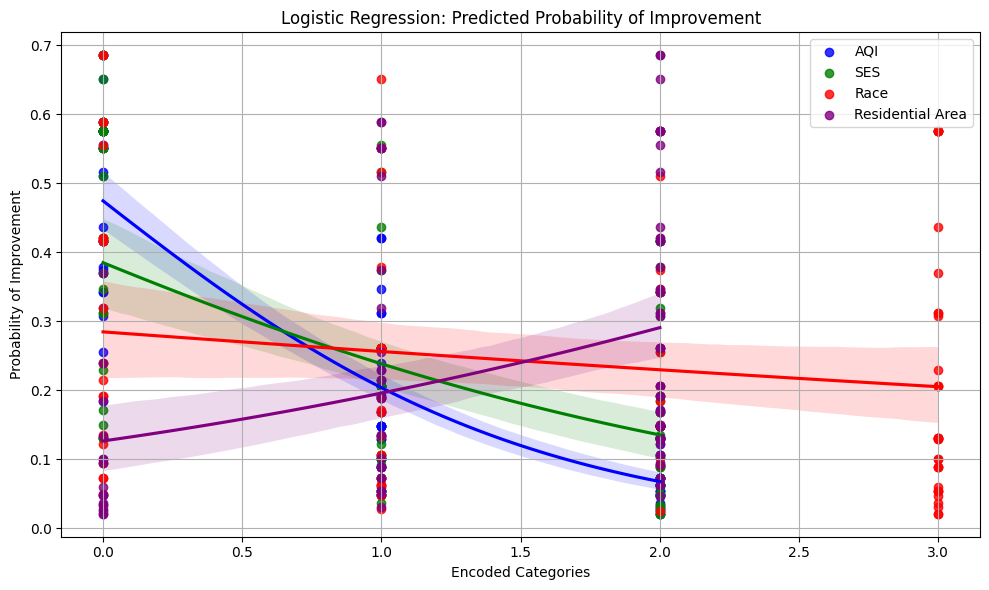

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the logistic regression lines on the same plot
plt.figure(figsize=(10, 6))

# Plot AQI
sns.regplot(x=df['AQI_Code'], y=result.predict(X), logistic=True, color='blue', label='AQI')

# Plot SES
sns.regplot(x=df['SES_Code'], y=result.predict(X), logistic=True, color='green', label='SES')

# Plot Race
sns.regplot(x=df['Race_Code'], y=result.predict(X), logistic=True, color='red', label='Race')

# Plot Residential Area
sns.regplot(x=df['Residential_Area_Code'], y=result.predict(X), logistic=True, color='purple', label='Residential Area')

plt.title('Logistic Regression: Predicted Probability of Improvement')
plt.xlabel('Encoded Categories')
plt.ylabel('Probability of Improvement')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Create the contingency table
contingency_table = pd.crosstab(index=[df['Gender'], df['Outcome']], columns=df['SES'])

# Print the contingency table to inspect
print("Contingency Table:")
print(contingency_table)

Contingency Table:
SES                      High  Low  Middle
Gender     Outcome                        
Female     Deteriorated     2   11       6
           Improved         4    0       1
           Stable           4    1      10
Male       Deteriorated     0    5       2
           Improved        10    2       7
           Stable           7    7      12
Non-binary Deteriorated     0    1       0
           Stable           3    2       3


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Define mapping dictionaries for Race and SES
race_mapping = {'White': 1, 'Black': 2, 'Hispanic': 3, 'Asian': 4}
ses_mapping = {'Low': 1, 'Middle': 2, 'High': 3}

# Encode Race and SES columns
df['Race_Encoded'] = df['Race'].map(race_mapping)
df['SES_Encoded'] = df['SES'].map(ses_mapping)

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Define the interaction term between Race and SES
df['Race_SES_Interaction'] = df['Race_Encoded'] * df['SES_Encoded']

# Define independent variables (Race, SES, and interaction term)
X = df[['Race_Encoded', 'SES_Encoded', 'Race_SES_Interaction']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.476114
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.1360
Time:                        08:16:34   Log-Likelihood:                -47.611
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                  0.001822
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.9981      2.229     -2.242      0.025      -9.367      -0.629

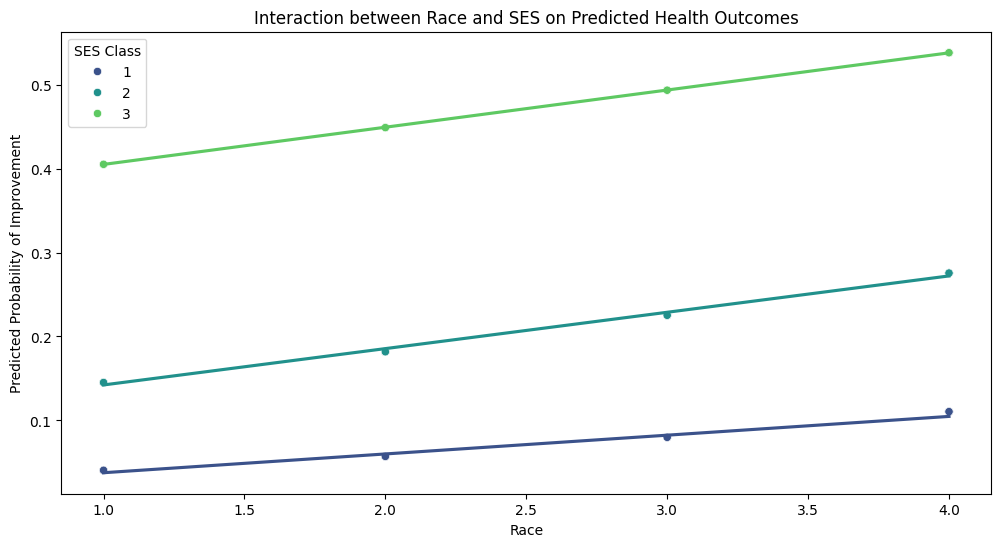

In [ ]:
df['predicted_prob'] = result.predict(X)

# Get unique SES classes
unique_ses_classes = df['SES_Encoded'].unique()
num_classes = len(unique_ses_classes)

# Generate a custom color palette
palette = sns.color_palette("viridis", num_classes)

# Plot the interaction effects
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Race_Encoded', y='predicted_prob', hue='SES_Encoded', data=df, palette=palette)

# Add regression lines
for ses in unique_ses_classes:
    subset = df[df['SES_Encoded'] == ses]
    sns.regplot(x='Race_Encoded', y='predicted_prob', data=subset, scatter=False, ci=None, color=palette[ses-1])

plt.title('Interaction between Race and SES on Predicted Health Outcomes')
plt.xlabel('Race')
plt.ylabel('Predicted Probability of Improvement')
plt.legend(title='SES Class')
plt.show()

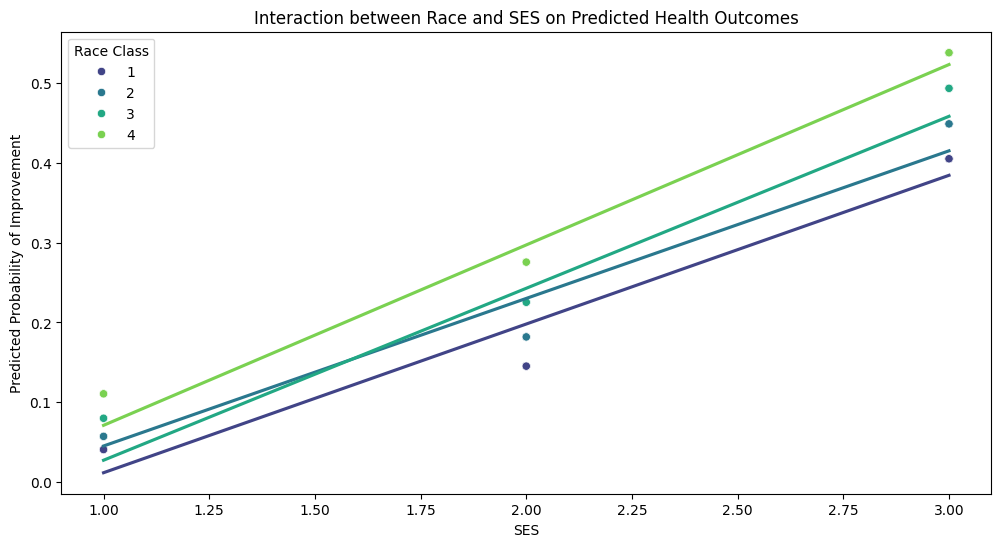

In [ ]:
df['predicted_prob'] = result.predict(X)

# Get unique SES classes
unique_ses_classes = df['Race_Encoded'].unique()
num_classes = len(unique_ses_classes)

# Generate a custom color palette
palette = sns.color_palette("viridis", num_classes)

# Plot the interaction effects
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SES_Encoded', y='predicted_prob', hue='Race_Encoded', data=df, palette=palette)

# Add regression lines
for ses in unique_ses_classes:
    subset = df[df['Race_Encoded'] == ses]
    sns.regplot(x='SES_Encoded', y='predicted_prob', data=subset, scatter=False, ci=None, color=palette[ses-1])

plt.title('Interaction between Race and SES on Predicted Health Outcomes')
plt.xlabel('SES')
plt.ylabel('Predicted Probability of Improvement')
plt.legend(title='Race Class')
plt.show()

### What is the interaction between residential area (urban, suburban, rural) and air quality in determining the health outcomes of cardiac patients?
-Logistic Regression with Interaction terms

In [ ]:
df_main = pd.read_csv('/content/CardiacPatientDataPGD.csv')

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Outcome' to binary variable: Improved = 1, Not Improved = 0
df['Outcome_Binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Encode categorical variables
df['Residential_Area_Encoded'] = df['Residential Area'].astype('category').cat.codes
df['AQI_Encoded'] = df['AQI'].astype('category').cat.codes

# Create interaction term
df['Area_AQI_Interaction'] = df['Residential_Area_Encoded'] * df['AQI_Encoded']

# Define independent variables
X = df[['Residential_Area_Encoded', 'AQI_Encoded', 'Area_AQI_Interaction']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Outcome_Binary']

# Perform logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.469525
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.1480
Time:                        08:16:35   Log-Likelihood:                -46.953
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                 0.0009791
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3160      0.952     -0.332      0.740      -2.183

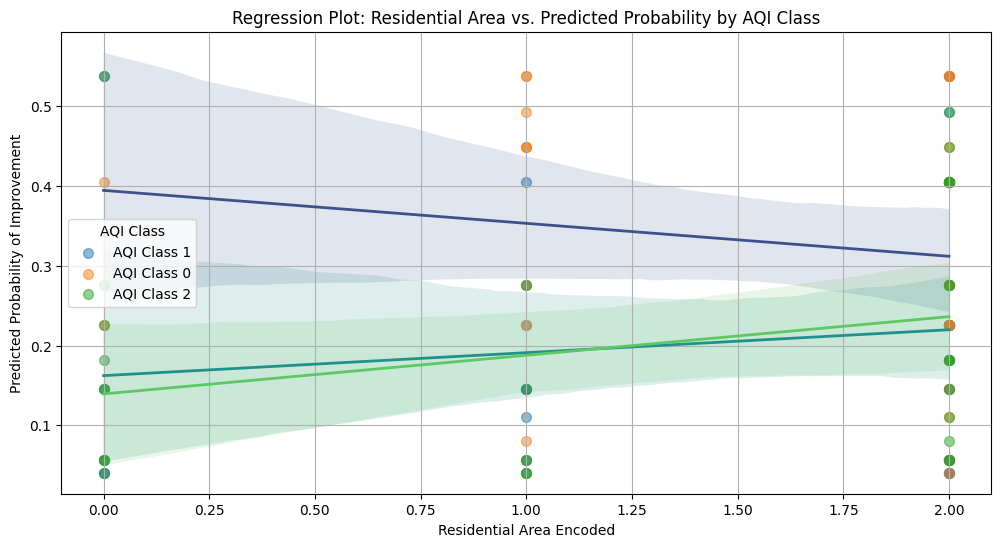

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'predicted_prob' is already computed from the logistic regression model

# Get unique AQI classes
unique_aqi_classes = df['AQI_Encoded'].unique()
num_classes = len(unique_aqi_classes)

# Generate a custom color palette
palette = sns.color_palette("viridis", num_classes)

# Plot the regression lines for each AQI class
plt.figure(figsize=(12, 6))
for aqi_class in unique_aqi_classes:
    subset = df[df['AQI_Encoded'] == aqi_class]
    sns.regplot(x='Residential_Area_Encoded', y='predicted_prob', data=subset, scatter=True,
                scatter_kws={'alpha':0.5, 's':50}, label=f'AQI Class {aqi_class}',
                line_kws={'linewidth': 2, 'color': palette[aqi_class]})

plt.title('Regression Plot: Residential Area vs. Predicted Probability by AQI Class')
plt.xlabel('Residential Area Encoded')
plt.ylabel('Predicted Probability of Improvement')
plt.legend(title='AQI Class')
plt.grid(True)
plt.show()

### Area vs Race

In [ ]:
df_main = pd.read_csv('/content/CardiacPatientDataPGD.csv')
df_main.columns

Index(['Patient ID', 'Age', 'Gender', 'Race', 'SES', 'Pre-existing Conditions',
       'Insurance Status (Y/N)', 'Marital Status', 'Employment Status',
       'Residential Area', 'AQI', 'Cardiac Condition', 'Treatment Plan',
       'Outcome'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Example data (replace with your actual dataframe)

df = df_main

# Encode categorical variables if needed
label_encoder = LabelEncoder()
df['Race_Code'] = label_encoder.fit_transform(df['Race'])
df['Residential_Area_Code'] = label_encoder.fit_transform(df['Residential Area'])

# Encode Outcome variable (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Create interaction terms between Race and Residential Area
df['Race_Residential_Interact'] = df['Race_Code'] * df['Residential_Area_Code']

# Define dependent (y) and independent variables (X)
y = df['Outcome_Code']
X = df[['Race_Code', 'Residential_Area_Code', 'Race_Residential_Interact']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.526667
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Outcome_Code   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                 0.04430
Time:                        08:16:36   Log-Likelihood:                -52.667
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                    0.1806
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.7616      0.889     -0.857      0.391      -2.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Example data (replace with your actual dataframe)

df = df_main

# Encode categorical variables if needed
label_encoder = LabelEncoder()
df['Race_Code'] = label_encoder.fit_transform(df['Race'])
df['Residential_Area_Code'] = label_encoder.fit_transform(df['Residential Area'])

# Encode Outcome variable (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Create interaction terms between Race and Residential Area
df['Race_Residential_Interact'] = df['Race_Code'] * df['Residential_Area_Code']

# Define dependent (y) and independent variables (X)
y = df['Outcome_Code']
X = df[['Race_Code', 'Residential_Area_Code', 'Race_Residential_Interact']]

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.526667
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Outcome_Code   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                 0.04430
Time:                        08:16:36   Log-Likelihood:                -52.667
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                    0.1806
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.7616      0.889     -0.857      0.391      -2.

Optimization terminated successfully.
         Current function value: 0.517009
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.348259
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.461523
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.676458
         Iterations 4


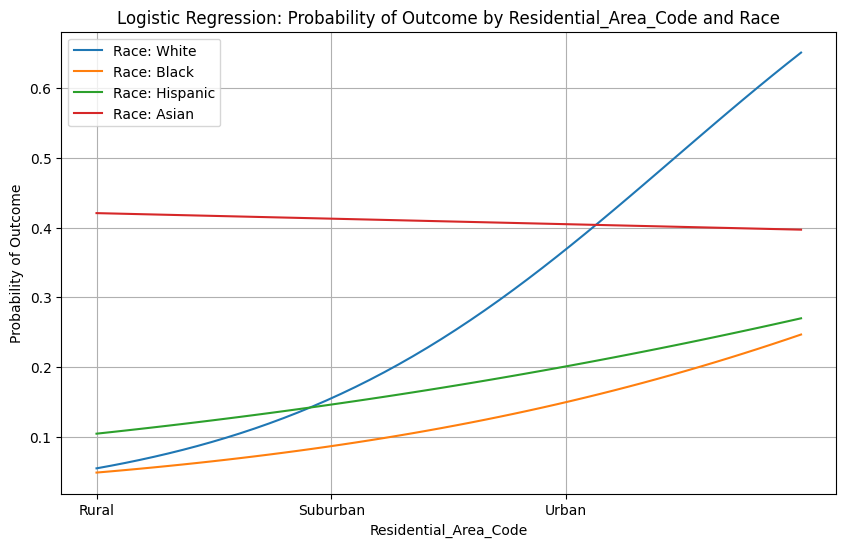

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains necessary columns: SES, Race, Outcome

# Encode Race if needed
label_encoder = LabelEncoder()
df['Race_Code'] = label_encoder.fit_transform(df['Race'])

# Encode Outcome variable (1 for Improved, 0 for Not Improved)
df['Outcome_Code'] = df['Outcome'].apply(lambda x: 1 if x == 'Improved' else 0)

# Define the SES values you want to plot (assuming SES is categorical or ordinal)
ses_values = sorted(df['Residential Area'].unique())

# Initialize plot
plt.figure(figsize=(10, 6))

# Iterate over each race category
for race_code, race_name in enumerate(df['Race'].unique()):
    # Subset data for the current race
    df_race = df[df['Race'] == race_name]

    # Fit logistic regression model for the current race
    logit_model = sm.Logit(df_race['Outcome_Code'], sm.add_constant(df_race['Residential_Area_Code']))
    result = logit_model.fit()

    # Predict probabilities for SES values
    ses_predict = np.linspace(0, len(ses_values), 50)  # Adjust based on SES range
    probabilities = result.predict(sm.add_constant(ses_predict))

    # Plot regression line
    plt.plot(ses_predict, probabilities, label=f'Race: {race_name}')

# Labeling and styling the plot
plt.xlabel('Residential_Area_Code')
plt.ylabel('Probability of Outcome')
plt.title('Logistic Regression: Probability of Outcome by Residential_Area_Code and Race')
plt.xticks(range(len(ses_values)), ses_values)  # Adjust ticks according to SES values
plt.legend()
plt.grid(True)
plt.show()

# Self Solving problems

### 1. How do age and SES interact to influence the outcomes of cardiac patients?
### 2. Are older patients more affected by poor air quality compared to younger patients, and how does SES modify this relationship?


##Age and Health Outcomes

## Intersectional AnalysesWhat is the combined effect of race, SES, and air quality on the cardiac health outcomes of patients?
### 1. How do gender, race/ethnicity, and insurance status intersect to impact the health outcomes of cardiac patients?
### 2. What are the outcomes for cardiac patients who are uninsured and living in areas with unhealthy air quality, and how do these outcomes vary by race/ethnicity and gender?
-Logistic Regression


## Specific Health Conditions and Treatments

### 1. How does the presence of specific pre-existing conditions (e.g., diabetes, hypertension) influence the treatment outcomes for different cardiac conditions across various SES and air quality levels?
### 2. What are the differences in treatment outcomes (medications, surgery, lifestyle changes) for cardiac conditions based on air quality and residential area?


## Policy and Intervention
### 1. What policy interventions could be most effective in improving cardiac health outcomes for low SES patients in areas with unhealthy air quality?
### 2. How could targeted healthcare policies address the disparities in cardiac health outcomes among different racial/ethnic groups?
### 3. What role can improved access to healthcare play in mitigating the effects of poor air quality on cardiac patients, particularly those from disadvantaged backgrounds?
